In [115]:
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda
import os, sys

In [116]:
U = mda.Universe("md.loop_SC_start.gro", "md.loop_SC_1.xtc")

seq = 'GIIDILQSYRLVKKLEHSWKALLHDGDTVSVHRPSFYAERF'
print(list(seq))

['G', 'I', 'I', 'D', 'I', 'L', 'Q', 'S', 'Y', 'R', 'L', 'V', 'K', 'K', 'L', 'E', 'H', 'S', 'W', 'K', 'A', 'L', 'L', 'H', 'D', 'G', 'D', 'T', 'V', 'S', 'V', 'H', 'R', 'P', 'S', 'F', 'Y', 'A', 'E', 'R', 'F']


In [117]:
# pseudo code for the analysis

# load trajectory
# for each residue in protein
    # calculate % time spent in contact < cutoff with every other residue in the protein
    # add this data to some kind of matrix
    # done
# plot this data as a contact matrix

In [118]:
U

<Universe with 447 atoms>

In [119]:
U.trajectory.totaltime

to_ns = 1000

U.trajectory.totaltime/to_ns


U.trajectory.n_frames
U.trajectory.frame


0

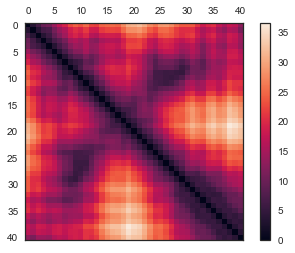

In [120]:
from MDAnalysis.analysis import distances

pep1 = U.select_atoms('name CA')
pep2 = U.select_atoms('name CA')
cmap  = distances.distance_array(pep1.positions, pep2.positions, box=pep1.dimensions)

fig, ax = plt.subplots()
ms = ax.matshow(cmap)
plt.colorbar(ms)



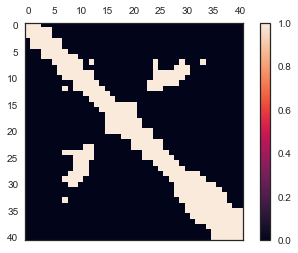

In [121]:
cutoff = 9  # ANGSTROM
contacts = cmap < cutoff

fig, ax = plt.subplots()
ms = ax.matshow(contacts)
plt.colorbar(ms)

/Users/sbamos/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


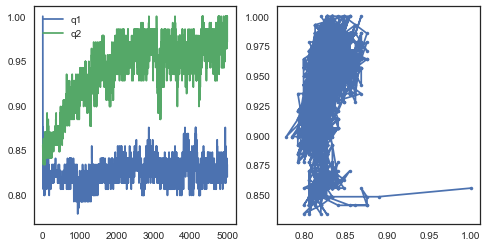

In [122]:
from MDAnalysis.analysis import contacts
q1q2 = contacts.q1q2(U, 'name CA', radius=8)
q1q2.run()

f, ax = plt.subplots(1, 2, figsize=plt.figaspect(0.5))
ax[0].plot(q1q2.timeseries[:, 0], q1q2.timeseries[:, 1], label='q1')
ax[0].plot(q1q2.timeseries[:, 0], q1q2.timeseries[:, 2], label='q2')
ax[0].legend(loc='best')
ax[1].plot(q1q2.timeseries[:, 1], q1q2.timeseries[:, 2], '.-')
f.show()

In [123]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#d = pd.DataFrame(cmap)
d = pd.DataFrame(cmap)#, columns=list(seq))

print(d)

           0          1          2          3          4          5   \
0    0.000000   3.766016   6.436567   9.928231  10.749245  14.269729   
1    3.766016   0.000000   3.810628   6.569311   7.153542  10.810657   
2    6.436567   3.810628   0.000000   3.822921   5.822873   9.297319   
3    9.928231   6.569311   3.822921   0.000000   3.724905   6.791920   
4   10.749245   7.153542   5.822873   3.724905   0.000000   3.806481   
5   14.269729  10.810657   9.297319   6.791920   3.806481   0.000000   
6   17.336209  13.683075  11.989670   8.676615   6.597313   3.790628   
7   19.405205  15.656902  14.478708  11.057234   9.087383   6.959042   
8   22.673246  18.970806  18.098362  14.811587  12.506127   9.990025   
9   24.293015  20.538652  19.469981  15.912120  14.356981  12.367929   
10  23.290794  19.570935  18.198266  14.504748  13.837445  12.567198   
11  25.144518  21.524860  19.750038  16.008873  16.102428  15.088409   
12  22.400387  18.861328  16.666220  12.922853  13.520337  12.78

In [124]:
corr = d.corr()

AttributeError: 'AxesSubplot' object has no attribute 'set_ylabels'

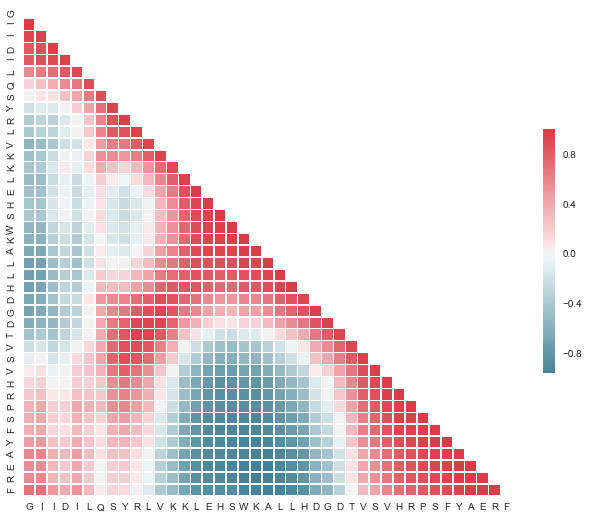

In [133]:
# generate a mask for the upper triangle so not as messy

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
c = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, xticklabels=list(seq), yticklabels=list(seq), linewidths=.5, cbar_kws={"shrink": .5})

In [98]:
from string import ascii_letters
list(ascii_letters[26:])

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

average contacts = 0.03387322535492902


/Users/sbamos/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


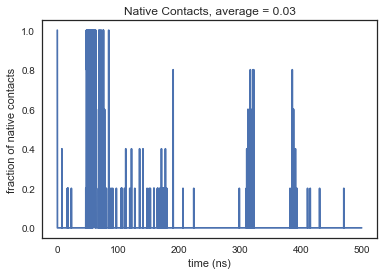

In [135]:
import MDAnalysis as mda
from MDAnalysis.analysis import contacts
import matplotlib.pyplot as plt

# crude definition of salt bridges as contacts between NH/NZ in ARG/LYS and
# OE*/OD* in ASP/GLU. You might want to think a little bit harder about the
# problem before using this for real work.
sel_1 = "resname ARG"
sel_2 = "resname LYS"
# reference groups (first frame of the trajectory, but you could also use a
# separate PDB, eg crystal structure)
group_1 = U.select_atoms(sel_1)
group_2 = U.select_atoms(sel_2)
# set up analysis of native contacts ("salt bridges"); salt bridges have a
# distance <6 A
ca1 = contacts.Contacts(U, selection=(sel_1, sel_2),
                        refgroup=(group_1, group_2), radius=6.0)
# iterate through trajectory and perform analysis of "native contacts" Q
ca1.run()
# print number of averave contacts
average_contacts = np.mean(ca1.timeseries[:, 1])
print('average contacts = {}'.format(average_contacts))
# plot time series q(t)
f, ax = plt.subplots()
ax.plot((ca1.timeseries[:, 0])/10, ca1.timeseries[:, 1])
ax.set(xlabel='time (ns)', ylabel='fraction of native contacts',
       title='Native Contacts, average = {:.2f}'.format(average_contacts))
fig.show()

()


ModuleNotFoundError: No module named 'quantopian'